In [201]:
# Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from datetime import datetime, timedelta
from dateutil.relativedelta import *


def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

def line_of_best_fit(X, Y): 
    """
    finds the line of best fit of two arrays using the (XtX)^-1Xty equation
    
    Args:
        x (array): either 1-d or 2-d
        y (array): 1-d
    
    Return:
        m (array): vector including intercept(first num) and slope(second num) for line of best fit
    
    """
    
    X_into_array = add_bias_column(X)
    XtXinv = np.linalg.inv(np.matmul(X_into_array.T, X_into_array))
    m = np.matmul(XtXinv, np.matmul(X_into_array.T, Y))
    
    return m

def linreg_predict(Xnew, ynew, m):
    """
    Predicts the linear regression and gives it a score on how well the variance is explained
    Args: 
        Xnew (array): either 1-d or 2-d, includes all p predictor features
        ynew (array): 1-d array, includes all correspondign response values to Xnew
        m (array): array that shows the intercept and the slope to be used for calculating ypreds
        
    Returns:
        dictionary (dict): four key-value pairs (ypreds, resids, mse, r2)
    
    """
    Xnew = add_bias_column(Xnew)
    ypreds = np.matmul(Xnew, m)
    resids = ynew - ypreds
    mse = (resids**2).sum()/resids.size
    r2 = r2_score(ynew, ypreds)
    
    dictionary = {'ypreds': ypreds,
                  'resids':resids,
                  'mse':mse,
                  'r2':r2
                 }
    return dictionary


In [202]:
# Read in the data
politician_data = pd.read_csv('politician_dataset.csv', index_col=0)

# Sort values by Trade Value and only filter by Stocks
politician_data.sort_values(by='Trade Value', ascending=False)[politician_data['Asset Type'] == 'Stock'].head(20)


/var/folders/s1/_6l1c54s6_bc396t_9ndyt900000gn/T/ipykernel_29503/438338352.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



txId                Name Politician Id       Party Chamber State  \
6839  10000061314       Richard Scott       S001217  Republican  Senate    FL   
2143  20003771272   Joshua Gottheimer       G000583    Democrat   House    NJ   
980   20003772715   Clifford Franklin       F000472  Republican   House    FL   
984   20003772510      Michael McCaul       M001157  Republican   House    TX   
983   20003772509      Michael McCaul       M001157  Republican   House    TX   
1171  20003772702      Michael McCaul       M001157  Republican   House    TX   
1074  20003772600      Michael McCaul       M001157  Republican   House    TX   
1172  20003772703      Michael McCaul       M001157  Republican   House    TX   
1073  20003772599      Michael McCaul       M001157  Republican   House    TX   
1082  20003772613      Michael McCaul       M001157  Republican   House    TX   
1081  20003772612      Michael McCaul       M001157  Republican   House    TX   
6849  20003767292        Seth Moulton       M001196    Democrat   House    MA   
6854  20003767297        Seth Moulton       M001196    Democrat   House    MA   
6871  20003767277       Suzan DelBene       D000617    Democrat   House    WA   
6770  10000061370  Richard Blumenthal       B001277    Democrat  Senate    CT   
6093  20003767930          Kevin Hern       H001082  Republican   House    OK   
6841  10000061316       Richard Scott       S001217  Republican  Senate    FL   
6840  10000061315       Richard Scott       S001217  Republican  Senate    FL   
9436  20003764521        Nancy Pelosi       P000197    Democrat   House    CA   
3045  10000062077  Richard Blumenthal       B001277    Democrat  Senate    CT   

     Asset Type                            Issuer Ticker Issuer Country  \
6839      Stock        WIRELESS TELECOM GROUP INC    WTT             us   
2143      Stock                    Microsoft Corp   MSFT             us   
980       Stock                     Brp Group Inc    BRP             us   
984       Stock               JPMorgan Chase & Co    JPM             us   
983       Stock               JPMorgan Chase & Co    JPM             us   
1171      Stock               JPMorgan Chase & Co    JPM             us   
1074      Stock               JPMorgan Chase & Co    JPM             us   
1172      Stock               JPMorgan Chase & Co    JPM             us   
1073      Stock               JPMorgan Chase & Co    JPM             us   
1082      Stock               JPMorgan Chase & Co    JPM             us   
1081      Stock               JPMorgan Chase & Co    JPM             us   
6849      Stock           Activision Blizzard Inc   ATVI             us   
6854      Stock           Activision Blizzard Inc   ATVI             us   
6871      Stock                    Microsoft Corp   MSFT             us   
6770      Stock  Radius Global Infrastructure Inc   RADI            NaN   
6093      Stock                         ONEOK Inc    OKE             us   
6841      Stock        WIRELESS TELECOM GROUP INC    WTT             us   
6840      Stock        WIRELESS TELECOM GROUP INC    WTT             us   
9436      Stock                    Microsoft Corp   MSFT             us   
3045      Stock                    Microsoft Corp   MSFT             us   

         Type Date Traded Date Published  Trade Size  Trade Price  Trade Value  
6839     Sell  2023-08-15     2023-09-15   1408452.0         2.13      3000000  
2143     Sell  2024-02-12     2024-03-07      7225.0       415.26      3000000  
980      Sell  2024-03-21     2024-04-23     54445.0        30.04      1635630  
984       Buy  2024-03-07     2024-04-22      5323.0       187.87      1000000  
983       Buy  2024-03-21     2024-04-22      5024.0       199.06      1000000  
1171     Sell  2024-03-07     2024-04-22      5323.0       187.87      1000000  
1074     Sell  2024-03-21     2024-04-22      5024.0       199.06      1000000  
1172     Sell  2024-03-21     2024-04-22      5024.0       199.06      1000000  
1073  

In [203]:
X = np.array(list(range(1, len(brp) + 1)))
Y = np.array(brp['Adj Close'])

equation = line_of_best_fit(X, Y)
predict = linreg_predict(X, Y, equation)
predict

{'ypreds': array([29.93463984, 29.83866041, 29.74268099, 29.64670157, 29.55072215,
        29.45474273, 29.35876331, 29.26278388, 29.16680446, 29.07082504,
        28.97484562, 28.8788662 , 28.78288678, 28.68690735, 28.59092793,
        28.49494851, 28.39896909, 28.30298967, 28.20701024, 28.11103082,
        28.0150514 , 27.91907198, 27.82309256, 27.72711314, 27.63113371,
        27.53515429, 27.43917487, 27.34319545, 27.24721603, 27.15123661,
        27.05525718, 26.95927776, 26.86329834, 26.76731892, 26.6713395 ,
        26.57536007]),
 'resids': array([-0.9946393 , -0.17866057,  0.84731916, -0.20670104, -0.25072291,
        -0.03474265,  0.321237  ,  0.92721665,  0.69319615,  0.17917496,
        -0.67484638, -0.50886536, -0.01288632,  0.25309318, -0.04092869,
        -0.08494866,  0.16103038, -0.87298936, -0.24701116,  0.91896986,
         0.64494845,  0.27092855, -0.15309248, -0.09711398, -0.42113463,
        -0.31515498, -1.00917457, -0.53319598,  0.34278413,  0.25876324,
        

In [196]:
brp = yf.download(['BRP'], start='2024-03-10', end='2024-05-01').reset_index()
brp['Adj Close Pred'] = predict['ypreds']

fig = go.Figure(data=[go.Candlestick(x=brp['Date'],
                open=brp['Open'], high=brp['High'],
                low=brp['Low'], close=brp['Close'])
                      ])
fig.add_trace(go.Scatter(x=brp['Date'], y=brp['Adj Close Pred'], mode='lines', name='Adj Close Prediction'))

fig.update_layout(
    title='BRP Stock Price Over time [Clifford Franklin (R)]',
    yaxis_title='BRP Stock',
    shapes = [dict(
        x0='2024-03-21', x1='2024-03-21', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[
        dict(
        x='2024-03-21', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='When stock was sold'),
        dict(
            x=0.97, y=0.95, xref='paper', yref='paper',
            showarrow=False, xanchor='right', yanchor='top', 
            text=f'y_hat = {equation[1]:.3f}x + {equation[0]:.3f}, MSE = {predict["mse"]:.3f}, R^2 = {predict["r2"]:.3f}')

        ]
    )
    
fig.show()

[*********************100%%**********************]  1 of 1 completed


Explore and Transfer one ML model to a Python Script (out
of Jupyter NB format)
- Transfer model training/testing cleaned data into the database
- Fully explore the first ML model (checking assumptions, model
validation...) via Jupyter
- Convert NB code into pure Python Script. Separate into
training/testing functions and inference functions
- Where possible, train once and store the appropriate model
weights/values in the database and use those for future prediction
instead of retraining every time a call is made

### Exploring First ML (regression) model

##### Checking Assumptions

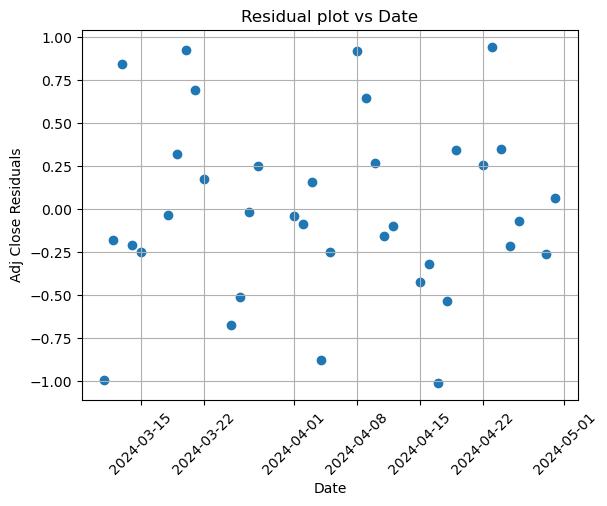

In [188]:
# Checking for linearity and homoscedasticity
plt.scatter(brp['Date'], predict['resids'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Adj Close Residuals')
plt.title('Residual plot vs Date')
plt.grid()
plt.show()

* Seems like points are scattered randomly witout any distinct patterns
* And is hovering around Residual=0

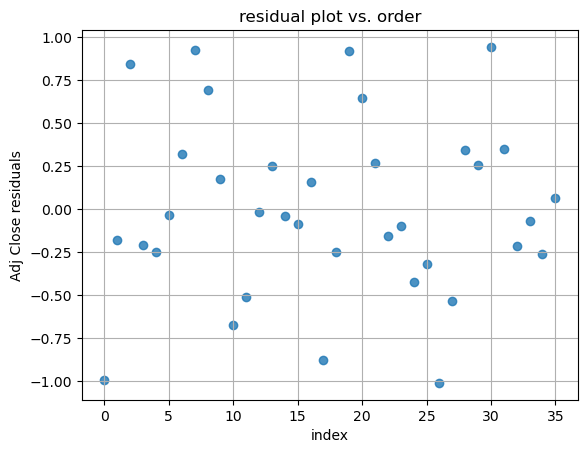

In [197]:
# Checking for No Autocorrelation (plotting by order)
plt.scatter(range(len(brp['Date'])), predict['resids'], alpha=0.8)
plt.xlabel("index")
plt.ylabel("Adj Close residuals")
plt.title("residual plot vs. order")
plt.grid()
plt.show()


* No distinct pattern can be identified in this graph

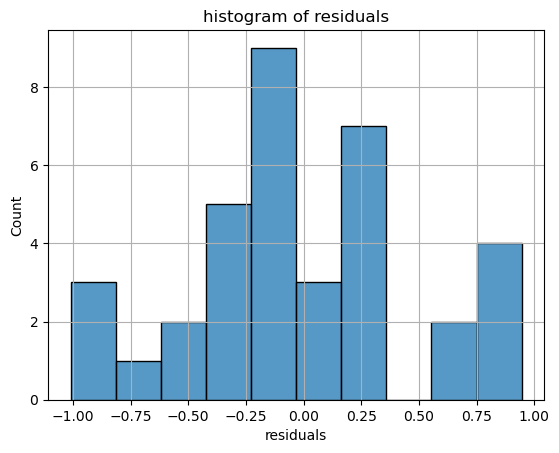

In [205]:
# Histogram of residuals
sns.histplot(predict['resids'], kde=False, bins = 10)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.grid()
plt.show()

### Cross Validating the Data

In [191]:
# Test size 30%
x_value = np.array(list(range(1, len(brp) + 1)))
y_value = np.array(brp['Adj Close'])
crossval = train_test_split(x_value,
                            y_value,
                            test_size=0.30,
                            random_state=3)

Xtrain, Xtest, ytrain, ytest = crossval
cross_equation = line_of_best_fit(Xtest, ytest)
cross_predict = linreg_predict(Xtest, ytest, cross_equation)

cross_predict


{'ypreds': array([29.44338321, 27.06666144, 27.9309239 , 27.49879267, 28.03895671,
        27.39075986, 28.25502232, 26.95862863, 28.47108794, 26.31043178,
        29.3353504 ]),
 'resids': array([-0.14338397, -0.63666113,  0.02907518,  0.17120741, -0.6089564 ,
         0.2392393 ,  0.15497752, -0.14862916,  0.4689126 ,  0.38956898,
         0.08464968]),
 'mse': 0.11900311702556882,
 'r2': 0.878204002234767}

* Mean Squared Error: 0.119003
* R^2: 0.878204
    * Means that 87.82% of the variance in the Dates can be explained by the variance of the Adj Close price

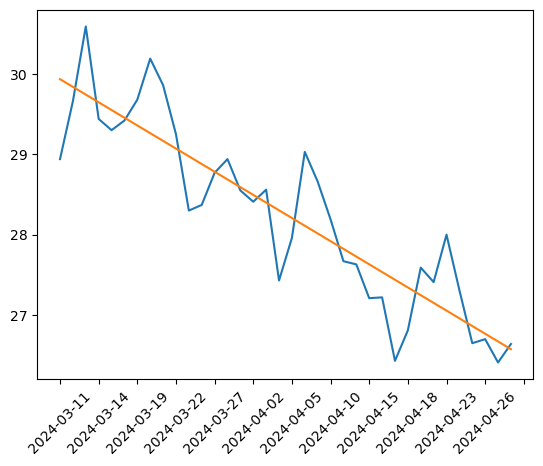

In [192]:
X = np.array(list(range(1, len(brp) + 1)))
Y = np.array(brp['Adj Close'])

equation = line_of_best_fit(X, Y)
predict = linreg_predict(X, Y, equation)
predict

fig, ax = plt.subplots(1,1)
ax.plot(brp['Date'].astype(str), Y)
ax.plot(brp['Date'].astype(str), predict['ypreds'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.xticks(rotation=45)
plt.show()